In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [2]:
#set up files path from cleaned data
clean_amazon = "../output/cleaned_Amazon Sale Report.csv"

clean_amazon_df = pd.read_csv(clean_amazon, usecols=lambda column: column != 'index')

clean_amazon_df

,Order ID,Date,Status,Status (Successful),Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids
0,405-8078784-5731545,2022-04-30,Cancelled,False,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN
1,171-9198151-1101146,2022-04-30,Delivered,True,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...
2,403-9615377-8133951,2022-04-30,Cancelled,False,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN
3,406-7807733-3785945,2022-04-30,Delivered,True,Merchant,Standard,JNE3405,JNE3405-KR-S,Kurta,S,B081WX4G4Q,1,399.00,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...
4,407-5443024-5233168,2022-04-30,Cancelled,False,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49806,402-0082204-6323568,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,XL,B09TH3H2DP,1,771.00,Junagadh,GUJARAT,362001.0,NaN
49807,408-9803724-6565965,2022-05-31,Cancelled,False,Amazon,Expedited,MEN5024,MEN5024-KR-L,Kurta,L,B08YYSQJTC,1,665.00,MUMBAI,MAHARASHTRA,400056.0,NaN
49808,408-5154281-4593912,2022-05-31,Cancelled,False,Amazon,Expedited,J0119,J0119-TP-XXXL,Top,3XL,B08RYPRVPV,1,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,NaN
49809,404-5182288-1653947,2022-05-31,Cancelled,False,Amazon,Expedited,JNE3638,JNE3638-KR-XS,Kurta,XS,B09814Q3QH,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN


In [3]:
#display the columns
clean_amazon_df.columns

Index(['Order ID', 'Date', 'Status', 'Status (Successful)', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids'],
      dtype='object')

In [4]:
clean_amazon_df.nunique()

Order ID               46332
Date                      90
Status                     3
Status (Successful)        2
Fulfilment                 2
ship-service-level         2
Style                   1185
SKU                     5594
Category                   7
Size                      11
ASIN                    5593
Qty                        6
Amount                  1280
ship-city               5500
ship-state                42
ship-postal-code        7013
promotion-ids           5557
dtype: int64

In [5]:
clean_amazon_df["ship-state"].value_counts()

ship-state
MAHARASHTRA               8230
KARNATAKA                 6143
UTTAR PRADESH             4310
TELANGANA                 4263
TAMIL NADU                4225
KERALA                    3007
DELHI                     2614
WEST BENGAL               2251
ANDHRA PRADESH            2217
GUJARAT                   1761
HARYANA                   1613
RAJASTHAN                 1134
MADHYA PRADESH            1061
BIHAR                      892
ODISHA                     855
PUNJAB                     755
ASSAM                      703
UTTARAKHAND                666
JHARKHAND                  615
GOA                        419
CHHATTISGARH               385
HIMACHAL PRADESH           370
JAMMU & KASHMIR            308
CHANDIGARH                 133
MANIPUR                    131
PUDUCHERRY                 126
ANDAMAN & NICOBAR          114
MEGHALAYA                   90
SIKKIM                      82
NAGALAND                    77
ARUNACHAL PRADESH           70
TRIPURA                     

In [6]:
# Group by 'Status Type' and 'Ship State' and sum the 'Revenue'
grouped_df = clean_amazon_df.groupby(['ship-state', 
                                      'Status'])['Amount'].sum().unstack(fill_value=0)

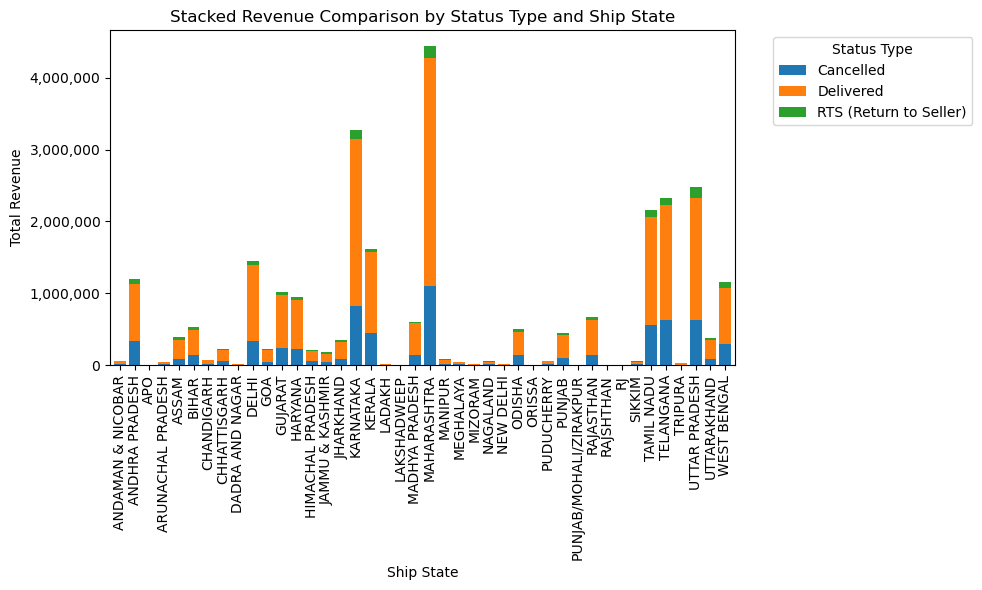

In [7]:
# Plotting using matplotlib
plt.figure(figsize=(10, 6))

# Plot a bar plot where 'Ship State' is on the x-axis and revenue on the y-axis
stat_plt = grouped_df.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)

# Adding labels and title
plt.title('Stacked Revenue Comparison by Status Type and Ship State')
plt.xlabel('Ship State')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

stat_plt.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Adding a legend to differentiate the status types
plt.legend(title='Status Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()